1. Cambie el número de observaciones a 100,000. ¿Qué ocurre?

In [18]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
# Por facilidad, declaramos una variable que indique el tamaño del conjunto 
#      de datos de entrenamiento.
observaciones = 100000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) # nótese que no se requieren las palabras clave

X = np.column_stack((x1,x2))


In [20]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

y = 2 * x1 - 3 * x2 + 5 + ruido

In [21]:
np.savez('Datos_TF', entradas = X, targets = y)  # nótese que se puede usar cualquier nombre

In [22]:
# Se cargan los datos desde el archivo NPZ.  Por supuesto, esto no era necesario acá
datos = np.load('Datos_TF.npz')

In [23]:
tamanio_entrada = 2

tamanio_salida = 1

In [24]:
modelo = tf.keras.Sequential([
                           
                            tf.keras.layers.Dense(tamanio_salida,
                                                 kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                 )
                            ])

In [25]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.02)

In [26]:
modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')

In [27]:
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 2)

Epoch 1/100
3125/3125 - 3s - loss: 0.7016 - 3s/epoch - 1ms/step
Epoch 2/100
3125/3125 - 3s - loss: 0.3807 - 3s/epoch - 957us/step
Epoch 3/100
3125/3125 - 3s - loss: 0.3816 - 3s/epoch - 944us/step
Epoch 4/100
3125/3125 - 3s - loss: 0.3794 - 3s/epoch - 989us/step
Epoch 5/100
3125/3125 - 3s - loss: 0.3838 - 3s/epoch - 1ms/step
Epoch 6/100
3125/3125 - 3s - loss: 0.3821 - 3s/epoch - 972us/step
Epoch 7/100
3125/3125 - 3s - loss: 0.3802 - 3s/epoch - 948us/step
Epoch 8/100
3125/3125 - 3s - loss: 0.3792 - 3s/epoch - 948us/step
Epoch 9/100
3125/3125 - 3s - loss: 0.3810 - 3s/epoch - 960us/step
Epoch 10/100
3125/3125 - 3s - loss: 0.3844 - 3s/epoch - 952us/step
Epoch 11/100
3125/3125 - 3s - loss: 0.3797 - 3s/epoch - 948us/step
Epoch 12/100
3125/3125 - 3s - loss: 0.3768 - 3s/epoch - 965us/step
Epoch 13/100
3125/3125 - 3s - loss: 0.3810 - 3s/epoch - 945us/step
Epoch 14/100
3125/3125 - 3s - loss: 0.3788 - 3s/epoch - 952us/step
Epoch 15/100
3125/3125 - 3s - loss: 0.3830 - 3s/epoch - 951us/step
Epoch 16

In [28]:
modelo.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[ 1.9600731],
        [-3.0105512]], dtype=float32),
 array([4.9896526], dtype=float32)]

In [29]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[ 1.9600731],
       [-3.0105512]], dtype=float32)

In [30]:

sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([4.9896526], dtype=float32)

In [31]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[ 51.9],
       [-24.9],
       [ -3.5],
       [  2.9],
       [ -7.8]], dtype=float32)

In [32]:
datos['targets'].round(1)[:5, :]

array([[ 51.4],
       [-24.5],
       [ -3.1],
       [  3.8],
       [ -8.4]])

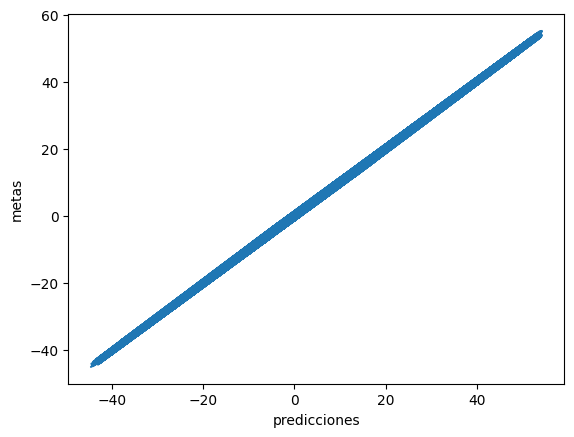

In [33]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

In [34]:
fig = px.scatter(x = np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
                 y =  np.squeeze(datos['targets']))

fig.update_layout(
    title="Comparación predicciones vrs metas",
    xaxis_title="Predicciones",
    yaxis_title="Metas",
    width = 600,
    height = 400,)

fig.show()